# Terrace correlation along the Licking River, Kentucky

In this tutorial, we will show how to use PyOSP performing intelligent swath analysis towards fluvial system. It consists of TPI bases swath analysis, scatter plot of obtained data, and histogram analysis. The content introduced here corresponds to the section 4.2 of [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). The installation of PyOSP is introduced by the tutorial [Topographic analysis of Teton Range, Wyoming](./pyosp_teton.ipynb), which will not be repeated here.

## TPI based swath analysis

In this case study, we use TPI based swath method to characterize the Licking River. In the [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860) Figure 9, we present the differences between TPI based and elevation based methods for identifying the river valley. In general, PyOSP classification of the Licking River Valley was successful using both TPI and elevation (Fig. 9c). However, elevation would not be an ideal classification criterion in valley settings with higher gradients, including a longer reach of the Licking River. A TPI value of 0, on the other
hand, will remain the approximate midpoint (inflection point) of the valley slopes along a river's entire length.

In [3]:
import pyosp

baseline = './pyosp-case-studies/licking/baseline.shp'
raster = './pyosp-case-studies/licking/licking_dem.tif'

tpi = pyosp.Tpi_curv(
    baseline,
    raster,
    width=10000,
    tpi_radius=5000,
    max_tpi=0,
    line_stepsize=100,
    cross_stepsize=100
)

Processing: [#########################] 1123 of 1123 lineSteps

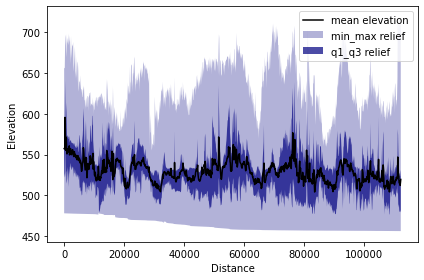

In [4]:
tpi.profile_plot()

## Terrace correlation

In this study, PyOSP post-processing capabilities were used to highlight the TPI based swath dataset in a way that accentuated terrace-tread signatures. To this end, the TPI swath area was categorized and filtered to incorporate only those elevation datapoints that also have a slope less than 5 degree, which were then used for a series of scatter-swath, cross-swath, and histogram analyses. 

### Scatter-swath

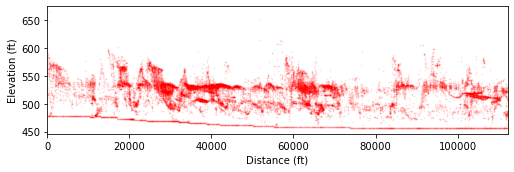

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# swath data with slope less than 5 degree
# see also: https://pyosp.readthedocs.io/en/latest/pyosp.curvsp.html#pyosp.curvsp.Base_curv.post_slope
tpi_small = tpi.post_slope(max_val=5)

distance = tpi_small[0]
dat = tpi_small[1]

fig, ax = plt.subplots(figsize=(7.25, 2.5))

for ind, d in enumerate(distance):
    y = dat[ind]
    x = np.repeat(d, len(y))
    ax.scatter(x, y, s=0.5, color='r', alpha=0.1)

ax.set_xlabel("Distance (ft)")
ax.set_ylabel("Elevation (ft)")
ax.set_xlim([min(distance), max(distance)])
# ax.set_ylim([450, 750])
plt.tight_layout()

In the figure above, the dark red clusters correspond to terrace tread elevations as we identified in the field. Details are presented in Figure 10 of PyOSP paper. 

### Cross-swath profiles

Four cross-swath sections were selected to examine the topographic view of each area.

As we mentioned in the Teton case study, there are two ways to define the boundary of cross swath profile:

1. Specify the start and end points positions away from the starting point of baseline.
2. Draw the points along the baseline, and then pass the shapefile of points to the function. 

In the documentation of PyOSP, there is a tutorial about application process of these two methods.

https://pyosp.readthedocs.io/en/latest/notebooks/cross_swath.html

Here we choose the second method to define the cross-swath boundary, using the boundary points we drew on the baseline.

<img alt="conda_terminar" src="https://i.imgur.com/jx6z2Zi.png" height="150"/>


C:\Users\yzh486\Miniconda3\envs\env_pyosp\lib\site-packages\pyosp\curvsp\base_curv.py:171: RuntimeWarning: All-NaN axis encountered
  min_z = [np.nanmin(x) if len(x) > 0 else np.nan for x in z]
C:\Users\yzh486\Miniconda3\envs\env_pyosp\lib\site-packages\pyosp\curvsp\base_curv.py:172: RuntimeWarning: All-NaN axis encountered
  max_z = [np.nanmax(x) if len(x) > 0 else np.nan for x in z]
C:\Users\yzh486\Miniconda3\envs\env_pyosp\lib\site-packages\pyosp\curvsp\base_curv.py:173: RuntimeWarning: Mean of empty slice
  mean_z = [np.nanmean(x) if len(x) > 0 else np.nan for x in z]
C:\Users\yzh486\Miniconda3\envs\env_pyosp\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\yzh486\Miniconda3\envs\env_pyosp\lib\site-packages\pyosp\curvsp\base_curv.py:171: RuntimeWarning: All-NaN axis encountered
  min_z = [np.nanmin(x) if len(x) > 0 else np.nan for x in z]
C:\Users\yzh486\Miniconda3\envs\env_pyosp\lib\site-packages\

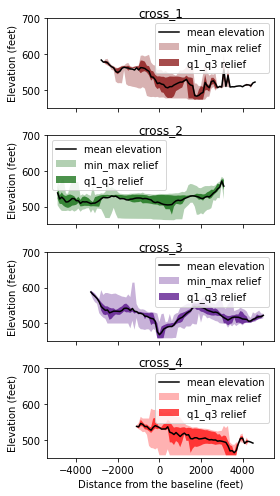

In [15]:
from pyosp.util import point_coords, grouped

# Read boundary coordinates
bound = './pyosp-case-studies/licking/BoundaryPoints.shp'
bound_coords = point_coords(bound)

# cross-post-processing
colors = ['maroon', 'darkgreen', 'indigo', 'red']
titles = ['cross_1', 'cross_2',  'cross_3', 'cross_4']
ind = 0

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(4, 7))
fig.subplots_adjust(hspace=0.2)

for start, end in grouped(bound_coords):
    tpi.post_slope(
        max_val=5,
        start=start,
        end=end,
        ax=ax[ind],
        color=colors[ind],
        cross=True,
        swath_plot=True
    )
    ax[ind].set_title(titles[ind], pad=2)
    ax[ind].set_xlabel("")
    ax[ind].set_ylabel("Elevation (feet)")
    ax[ind].set_ylim(450,700)

    if ind == len(colors)-1:
        ax[ind].set_xlabel('Distance from the baseline (feet)')

    ind += 1

plt.tight_layout()  

### Histogram of cross-swath profile

Last, we plot the histogram of captured cross-swath profile. 

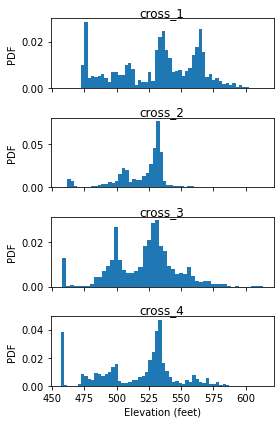

In [16]:
ind = 0

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(4, 6))
fig.subplots_adjust(hspace=0.2)

for start, end in grouped(bound_coords):
    dat = tpi.post_slope(max_val=5.,
                         start=start,
                         end=end,
                         ax=ax[ind],
                         color=colors[ind],
                         cross=True,
                         swath_plot=False
                        )
    tpi.hist(dat=dat[1],ax=ax[ind])
    ax[ind].set_title(titles[ind], pad=2)
    ax[ind].set_xlabel("")
    ax[ind].set_ylabel("PDF")

    if ind == len(colors)-1:
        ax[ind].set_xlabel('Elevation (feet)')

    ind += 1

plt.tight_layout()  

Discussion of above results are presented in the [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). 

## Summary

This tutorial introduces the swath analysis of Licking River by PyOSP, which corresponds to section 4.2 of [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). In the next tutorial, we will use PyOSP to perform circular swath analysis toward Olympus Mons, Mars.

If you have any further questions, you can open an issue at https://github.com/PyOSP-devs/PyOSP, or send email to yichuan211@gmail.com